In [2]:
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros
import matplotlib.pyplot as plt

### 常系数扩散方程
考虑扩散方程：
$$
\partial_t u = \alpha \Delta u
$$

边界条件：
$$
u(0)=0\quad u(1)=0
$$
和之前保持一致$\quad\alpha = 1$

In [23]:
# parameters
nx, nt = 100, 75
hx, ht = 1./(nx-1), 0.01/(nt-1)
x = np.linspace(0,1,nx)

u_left, u_right = 0, 0
u_start = np.exp(-150*(x-0.3)**2)


def residual(u):
    d2x = zeros_like(u)
    dy = zeros_like(u)

    d2x[1:-1,:] = (u[2:,:]   - 2*u[1:-1,:] + u[:-2,:]) / hx/hx
    d2x[0,:]    = (u[1,:]    - 2*u[0,:]    + u_left)/hx/hx
    d2x[-1,:]   = (u_right - 2*u[-1,:]   + u[-2,:])/hx/hx

    dy[:,1:] = (u[:,1:] - u[:,:-1])/ht
    dy[:,0]  = (u[:,0] - u_start)/ht

    return d2x - dy 

# solve
guess = zeros((nx, nt), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)

0:  |F(x)| = 296.024; step 1
1:  |F(x)| = 141.567; step 1
2:  |F(x)| = 87.8642; step 1


3:  |F(x)| = 82.6187; step 1
4:  |F(x)| = 63.092; step 1
5:  |F(x)| = 28.7614; step 1
6:  |F(x)| = 1.87386; step 1
7:  |F(x)| = 0.021528; step 1
8:  |F(x)| = 0.00123308; step 1
9:  |F(x)| = 0.000281418; step 1
10:  |F(x)| = 5.53985e-05; step 1
11:  |F(x)| = 4.19826e-06; step 1


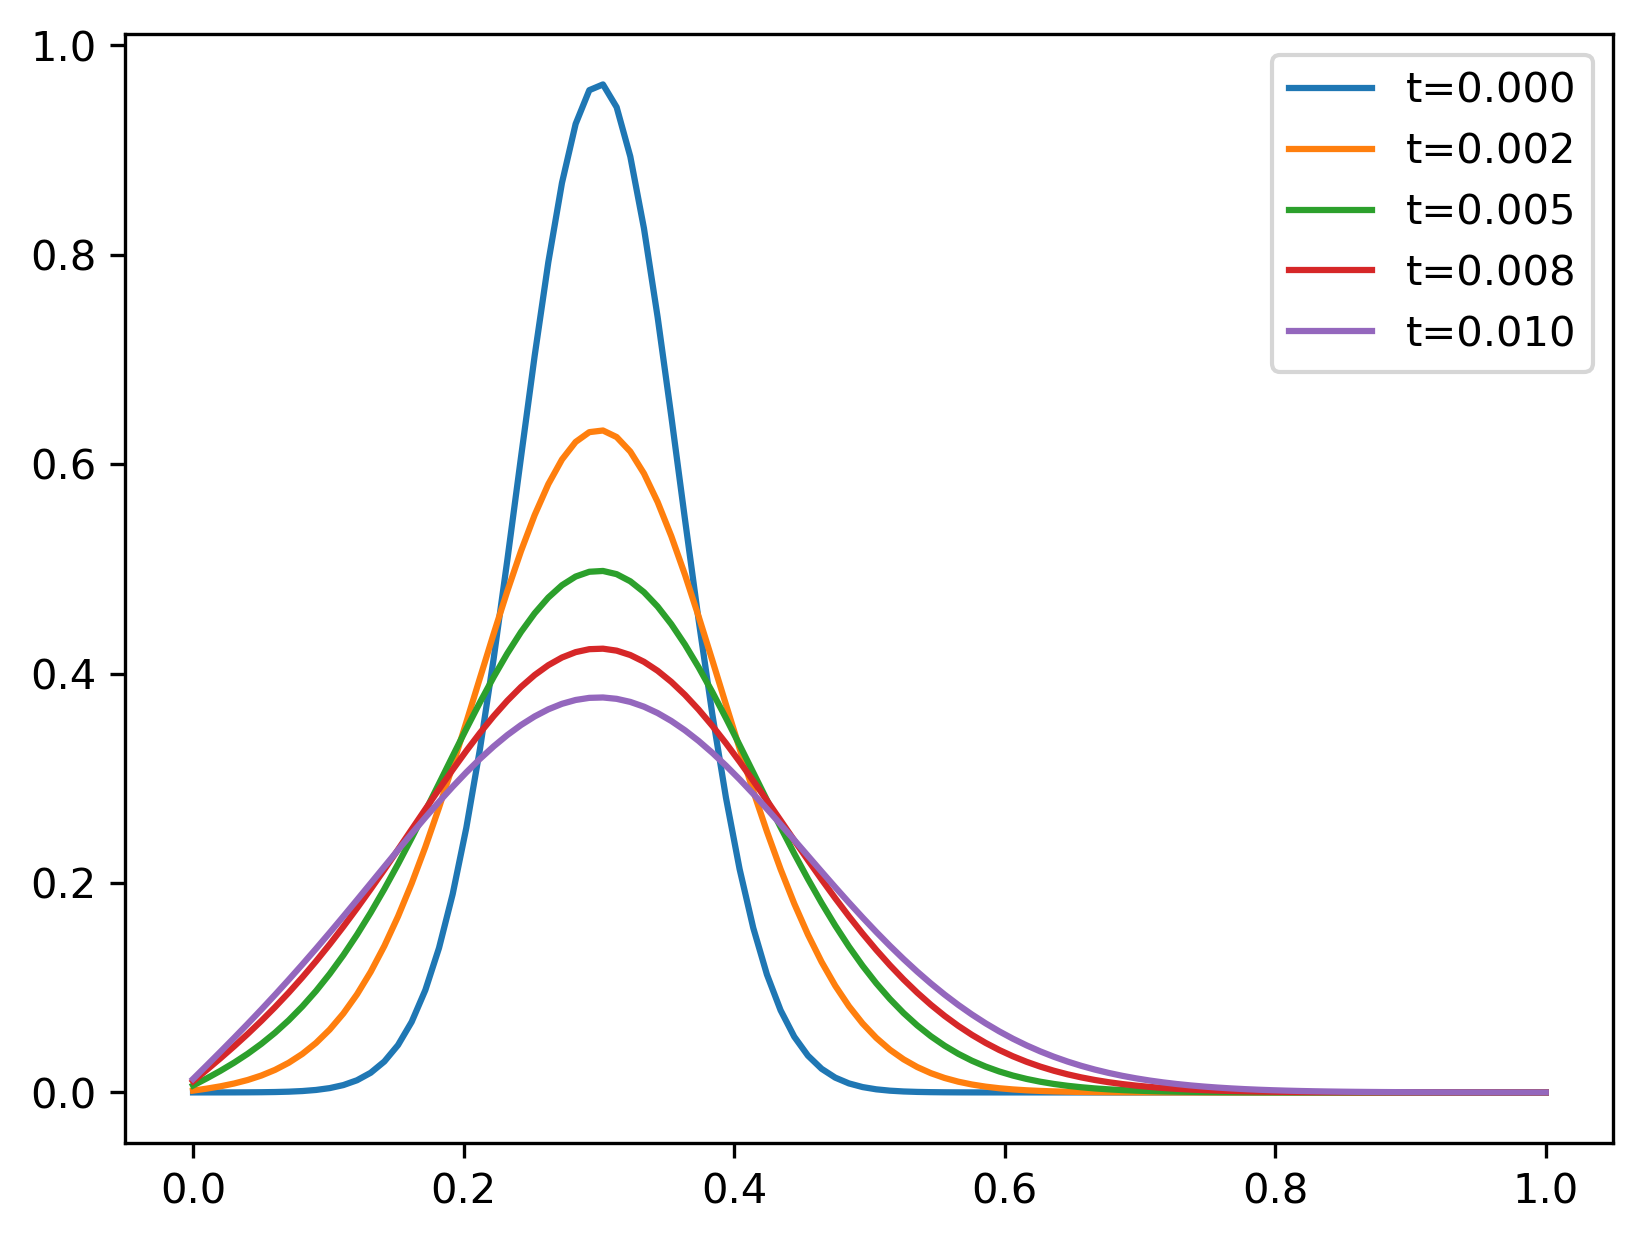

In [24]:
plt.figure(dpi=300)
for ti in [0, int(nt/4), int(2*nt/4), int(3*nt/4), nt-1]:
    plt.plot(x, sol[:,ti], label="t=%.3f"%(ht*ti))
plt.legend()

In [46]:
# parameters
nx, nt = 100, 75
hx, ht = 1./(nx-1), 0.01/(nt-1)
x = np.linspace(0,1,nx)

u_left, u_right = 0, 0
u_start = np.exp(-150*(x-0.3)**2)


def residual(u):
    d2x = zeros_like(u)
    dy = zeros_like(u)
    pdx = zeros_like(u)
    ndx = zeros_like(u)

    ndx[0,:] =  np.maximum((u[0,:] - u_left)/hx,0)
    pdx[-1,:]=  np.minimum((u_right-u[-1,:])/hx,0)
    
    pdx[0:-1,:] = np.minimum((u[1:,:]-u[0:-1,:])/hx,0) 
    ndx[1:,:] = np.maximum((u[1:,:]-u[:-1,:])/hx,0)

    d2x[1:-1,:] = (u[2:,:]   - 2*u[1:-1,:] + u[:-2,:]) / hx/hx
    d2x[0,:]    = (u[1,:]    - 2*u[0,:]    + u_left)/hx/hx
    d2x[-1,:]   = (u_right - 2*u[-1,:]   + u[-2,:])/hx/hx

    H = 2*(pdx**2+ndx**2)
    dy[:,1:] = (u[:,1:] - u[:,:-1])/ht
    dy[:,0]  = (u[:,0] - u_start)/ht
    return d2x - dy + H

guess = zeros((nx, nt), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)

0:  |F(x)| = 367.228; step 1
1:  |F(x)| = 203.56; step 1


2:  |F(x)| = 120.717; step 1
3:  |F(x)| = 89.1543; step 1
4:  |F(x)| = 75.8572; step 1
5:  |F(x)| = 40.9168; step 1
6:  |F(x)| = 4.11414; step 1
7:  |F(x)| = 1.08769; step 1
8:  |F(x)| = 0.335248; step 1
9:  |F(x)| = 0.015231; step 1
10:  |F(x)| = 0.00253185; step 1
11:  |F(x)| = 0.00033088; step 1
12:  |F(x)| = 2.51643e-05; step 1
13:  |F(x)| = 1.37443e-05; step 1
14:  |F(x)| = 4.92404e-06; step 1


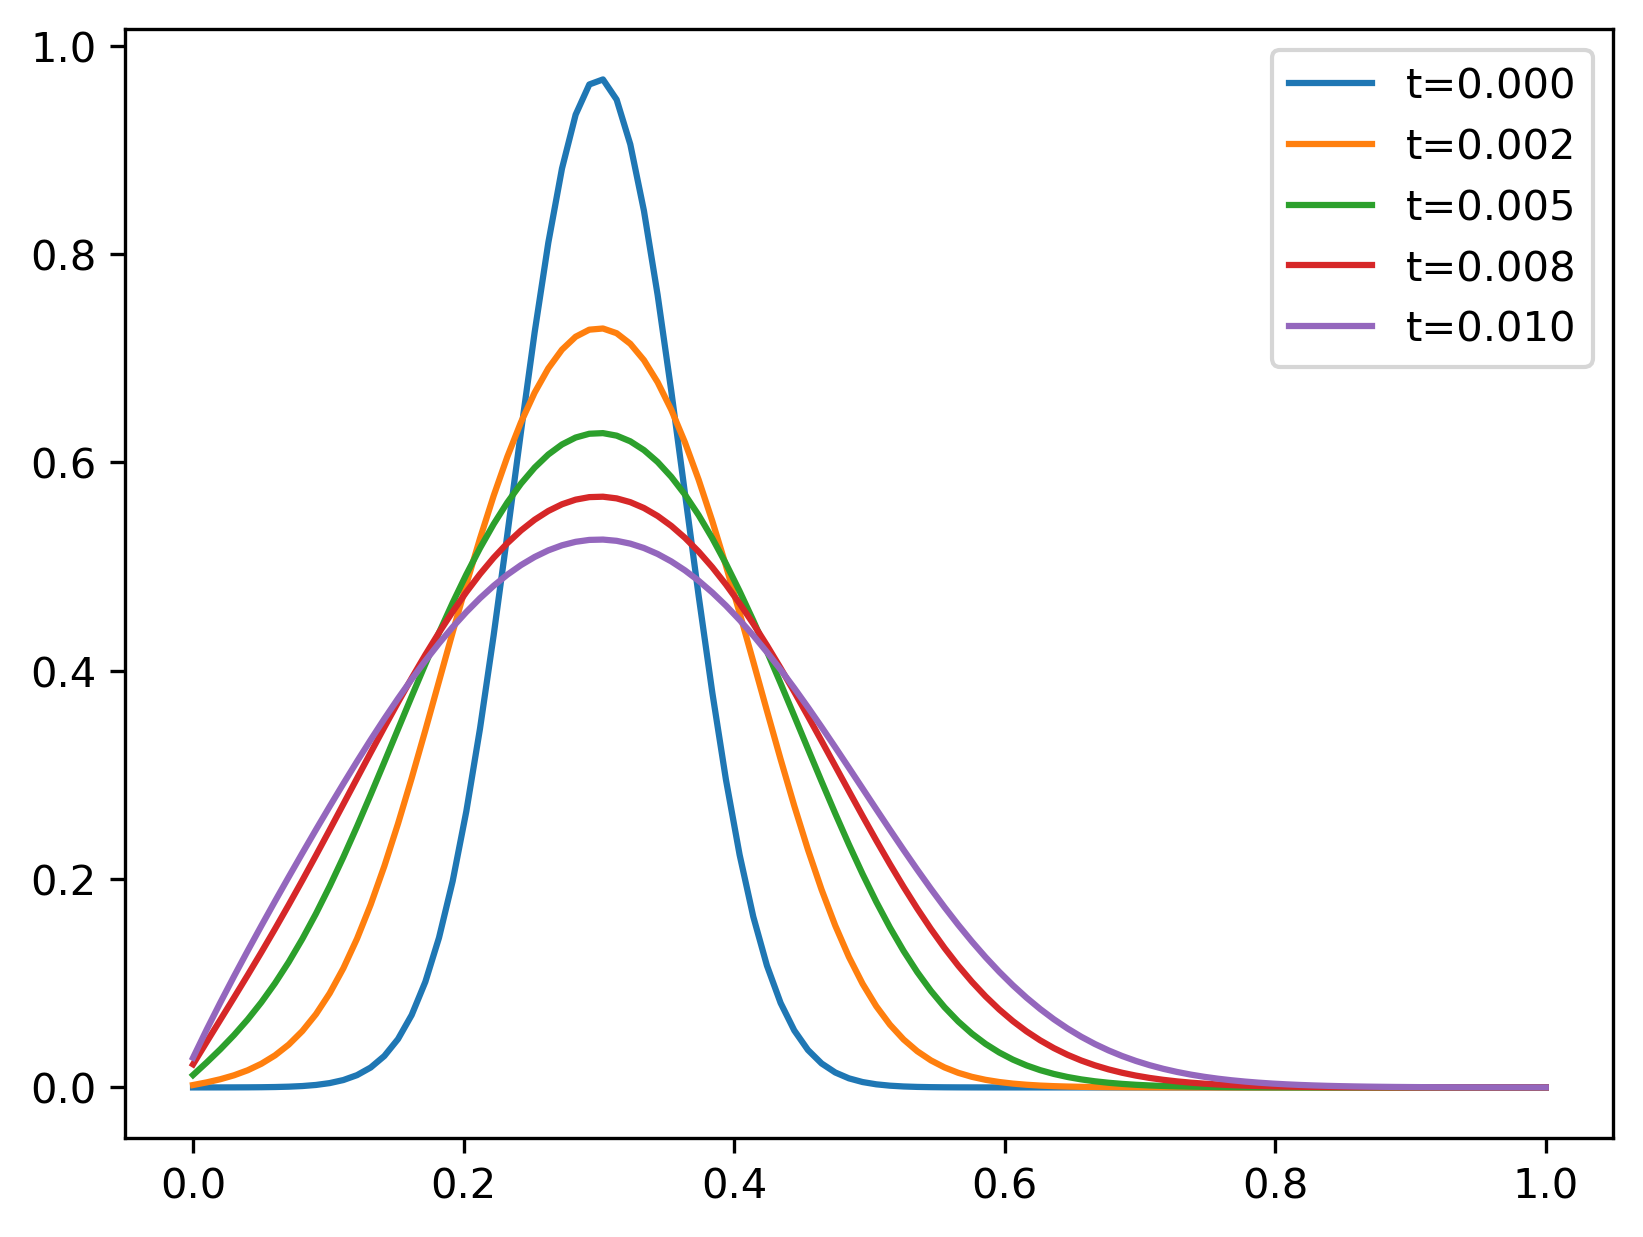

In [47]:
plt.figure(dpi=300)
for ti in [0, int(nt/4), int(2*nt/4), int(3*nt/4), nt-1]:
    plt.plot(x, sol[:,ti], label="t=%.3f"%(ht*ti))
plt.legend()

### 常微分例子
$$
\frac{d^2y}{dx^2}=-1
$$

边界条件：
y(0)=0
y(1)=0

显然通解为：
$$
y=-0.5*x^2+0.5*x
$$

In [97]:
t=np.linspace(0,1,1000)
dt = t[1]-t[0]
x_1 = 0
x_end = 0
def residual(x):
    d2t = zeros_like(x)
    d2t[1:-1] = (x[2:]-2*x[1:-1]+x[:-2])/dt**2    
    d2t[0] = (x[2]-2*x[0]+x_1)/dt**2
    d2t[-1] = (x_end-2*x[-1]+x[-2])/dt**2
    return d2t + 1
# solve
guess = np.sin(t)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)

0:  |F(x)| = 5220.59; step 1
1:  |F(x)| = 1359.9; step 1
2:  |F(x)| = 410.627; step 1
3:  |F(x)| = 213.675; step 1
4:  |F(x)| = 141; step 1
5:  |F(x)| = 98.892; step 1
6:  |F(x)| = 73.7913; step 1
7:  |F(x)| = 57.6553; step 1
8:  |F(x)| = 47.2927; step 1
9:  |F(x)| = 38.9189; step 1
10:  |F(x)| = 32.332; step 1
11:  |F(x)| = 27.4499; step 1
12:  |F(x)| = 22.9288; step 1
13:  |F(x)| = 20.094; step 1
14:  |F(x)| = 17.7903; step 1
15:  |F(x)| = 15.74; step 1
16:  |F(x)| = 13.8967; step 1
17:  |F(x)| = 12.2557; step 1
18:  |F(x)| = 10.7634; step 1
19:  |F(x)| = 9.68086; step 1
20:  |F(x)| = 8.80227; step 1
21:  |F(x)| = 7.94031; step 1
22:  |F(x)| = 7.16885; step 1
23:  |F(x)| = 6.45663; step 1
24:  |F(x)| = 5.8844; step 1
25:  |F(x)| = 5.38458; step 1
26:  |F(x)| = 4.91317; step 1
27:  |F(x)| = 4.54034; step 1
28:  |F(x)| = 4.16371; step 1
29:  |F(x)| = 3.85303; step 1
30:  |F(x)| = 3.57242; step 1
31:  |F(x)| = 3.30791; step 1
32:  |F(x)| = 3.09986; step 1
33:  |F(x)| = 2.91019; step 1
3

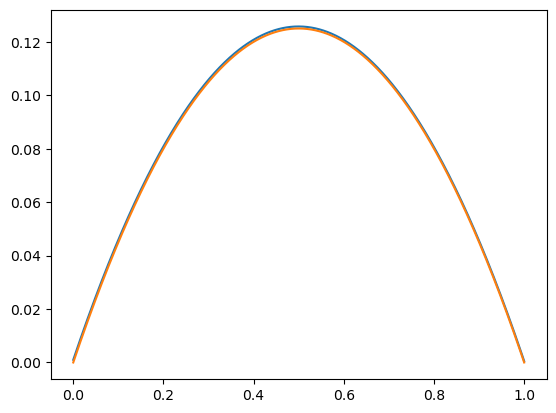

In [98]:
plt.plot(t,sol)
plt.plot(t, -0.5*t**2+0.5*t)

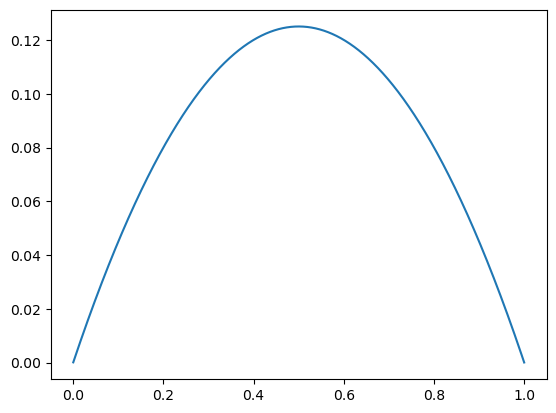

In [96]:
plt.plot(t,sol)

###  注意：
使用 Newton 法的时候，两边的值都是需要确定的，当有一个边界的值不好确定时，效果就会差很多。

$$
\frac{d^2x}{dt^2}=-x
$$

已知
$$
x(0) = 1\quad
\frac{dx}{dt}(0) = 0
$$

在设计的方程组的时候, 考虑 $x_1=1,x_2=1$求解$\quad x_3,x_4,...,x_{end}$

$$
\frac{d^2x_2}{dt^2}=\frac{x_3-2x_2+x_1}{dt^2}=-x_2\\[5pt]
\frac{d^2x_3}{dt^2}=\frac{x_4-2x_3+x_2}{dt^2}=-x_3\\
\cdots\\
\cdots\\
\cdots\\
\frac{d^2x_{end-1}}{dt^2}=\frac{x_{end}-2x_{end-1}+x_{end-2}}{dt^2}=-x_{end-1}
$$
这个时候有$end-2$个方程组，未知量也是$(end-2)$个, 也就是$(x_3,x_4,...,x_{end})$

In [173]:
t=np.linspace(0,(np.pi),40)
dt = t[1]-t[0]
x_1 = 1
x_2 = 1
def residual(x):
    d2t = zeros_like(x)
    d2t[0] = (x[0]-2*x_2+x_1)/dt**2          ## d2t[0] 代表 d^2x_2/dt^2
    d2t[1] = (x[1]-2*x[0]+x_2)/dt**2 
    d2t[2:] = (x[2:]-2*x[1:-1]+x[0:-2])/dt**2 
    x = np.insert(x,0,x_2)[0:-1]   
    return d2t + 1*x
# solve
guess = np.sin(t)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)

0:  |F(x)| = 52.5762; step 1
1:  |F(x)| = 52.4416; step 1
2:  |F(x)| = 52.0236; step 1
3:  |F(x)| = 48.3254; step 1
4:  |F(x)| = 34.6096; step 1
5:  |F(x)| = 29.2168; step 1
6:  |F(x)| = 23.0906; step 1
7:  |F(x)| = 19.7101; step 1
8:  |F(x)| = 15.4449; step 1
9:  |F(x)| = 3.4487; step 1
10:  |F(x)| = 0.979576; step 1
11:  |F(x)| = 1.42142e-06; step 1


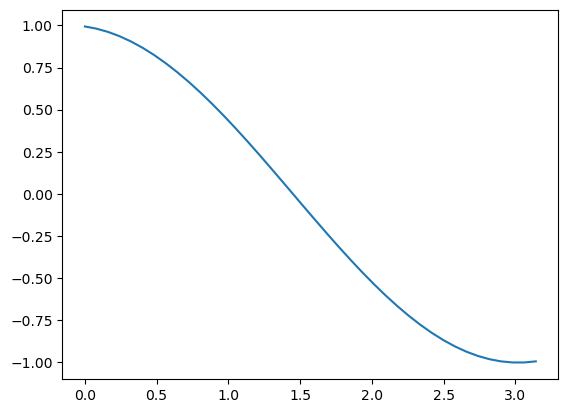

In [174]:
plt.plot(t,sol)

In [175]:
t=np.linspace(0,np.pi,50)
dt = t[1]-t[0]
x_1 = 1
x_2 = 1
def residual(x):
    d2t = zeros_like(x)
    d2t[0] = (x[0]-2*x_2+x_1)/dt**2          ## d2t[0] 代表 d^2x_2/dt^2
    d2t[1] = (x[1]-2*x[0]+x_2)/dt**2 
    d2t[2:] = (x[2:]-2*x[1:-1]+x[0:-2])/dt**2 
    x = np.insert(x,0,x_2)[0:-1]   
    return d2t + x
# solve
guess = np.sin(t)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)

0:  |F(x)| = 87.5309; step 1
1:  |F(x)| = 83.8806; step 1
2:  |F(x)| = 83.3317; step 1
3:  |F(x)| = 83.3277; step 1
4:  |F(x)| = 83.3201; step 1
5:  |F(x)| = 83.3595; step 1
6:  |F(x)| = 83.3665; step 1
7:  |F(x)| = 83.3835; step 1
8:  |F(x)| = 83.4012; step 1
9:  |F(x)| = 83.429; step 1
10:  |F(x)| = 83.4127; step 1
11:  |F(x)| = 70.2666; step 1
12:  |F(x)| = 68.6517; step 1
13:  |F(x)| = 63.8822; step 1
14:  |F(x)| = 56.5444; step 1
15:  |F(x)| = 56.4543; step 1
16:  |F(x)| = 54.7626; step 1
17:  |F(x)| = 54.3808; step 1
18:  |F(x)| = 54.2639; step 1
19:  |F(x)| = 54.2509; step 1
20:  |F(x)| = 54.1114; step 1
21:  |F(x)| = 53.5826; step 1
22:  |F(x)| = 53.2342; step 1
23:  |F(x)| = 52.8755; step 1
24:  |F(x)| = 51.8953; step 1
25:  |F(x)| = 51.6508; step 1
26:  |F(x)| = 51.6142; step 1
27:  |F(x)| = 51.3638; step 1
28:  |F(x)| = 51.4103; step 1
29:  |F(x)| = 50.3954; step 1
30:  |F(x)| = 50.587; step 1
31:  |F(x)| = 50.4962; step 1
32:  |F(x)| = 50.4866; step 0.500047
33:  |F(x)| = 5

KeyboardInterrupt: 